In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nyc-rolling-sales.csv',encoding='latin-1')
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# **PREPROCESSING DATA**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
#data['SALE PRICE'].unique()
data['SALE PRICE']=data['SALE PRICE'].replace([' -  '], '0')
data=data.astype({'BOROUGH':str})
data=data.astype({'SALE PRICE':int})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [11]:
dataa=data.groupby(['BOROUGH','NEIGHBORHOOD']).sum()[['TOTAL UNITS','SALE PRICE']].reset_index()
dataa

,BOROUGH,NEIGHBORHOOD,TOTAL UNITS,SALE PRICE
0,1,ALPHABET CITY,567,384835657
1,1,CHELSEA,1641,2475399537
2,1,CHINATOWN,297,183820834
3,1,CIVIC CENTER,448,2024972950
4,1,CLINTON,497,555438713
...,...,...,...,...
251,5,TRAVIS,105,62798815
252,5,WEST NEW BRIGHTON,419,101233372
253,5,WESTERLEIGH,351,101147566
254,5,WILLOWBROOK,307,81327023


In [12]:
Price_per_unit=pd.DataFrame(dataa['SALE PRICE']/dataa['TOTAL UNITS'], columns=['PRICE PER UNIT'])
Price_per_unit

,PRICE PER UNIT
0,6.787225e+05
1,1.508470e+06
2,6.189254e+05
3,4.520029e+06
4,1.117583e+06
...,...
251,5.980840e+05
252,2.416071e+05
253,2.881697e+05
254,2.649089e+05


In [14]:
data1=pd.concat([dataa, Price_per_unit], axis=1)
data1=data1.replace([np.inf, -np.inf], np.nan).dropna(axis=0).reset_index()
data1=data1.astype({'PRICE PER UNIT':int})
print(data1.info())
data1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           254 non-null    int64 
 1   BOROUGH         254 non-null    object
 2   NEIGHBORHOOD    254 non-null    object
 3   TOTAL UNITS     254 non-null    int64 
 4   SALE PRICE      254 non-null    int64 
 5   PRICE PER UNIT  254 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 12.0+ KB
None


,index,BOROUGH,NEIGHBORHOOD,TOTAL UNITS,SALE PRICE,PRICE PER UNIT
0,0,1,ALPHABET CITY,567,384835657,678722
1,1,1,CHELSEA,1641,2475399537,1508470
2,2,1,CHINATOWN,297,183820834,618925
3,3,1,CIVIC CENTER,448,2024972950,4520028
4,4,1,CLINTON,497,555438713,1117582
...,...,...,...,...,...,...
249,251,5,TRAVIS,105,62798815,598083
250,252,5,WEST NEW BRIGHTON,419,101233372,241607
251,253,5,WESTERLEIGH,351,101147566,288169
252,254,5,WILLOWBROOK,307,81327023,264908


# **MEASUREMENT OF CENTRAL TENFDENCY**

#### 1. RATA-RATA HARGA JUAL BANGUNAN PADA SETIAP WILAYAH (BOROUGH)

In [15]:
Bor_Mean=data1.groupby(['BOROUGH']).mean()['PRICE PER UNIT'].rename('PRICE PER UNIT (MEAN)').round(2).reset_index()
Bor_Mean

,BOROUGH,PRICE PER UNIT (MEAN)
0,1,1508178.31
1,2,508794.26
2,3,535404.10
3,4,313830.22
4,5,1375295.67


**Kesimpulan 1:** wilayah 1 memiliki harga unit dengan rata-rata tertinggi, sedangkan yang terendah adalah wilayah 4

#### 2. NILAI TENGAH (MEDIAN) HARGA JUAL BANGUNAN PADA SETIAP WILAYAH (BOROUGH)

In [16]:
Bor_Median=data1.groupby(['BOROUGH']).median()['PRICE PER UNIT'].rename('PRICE PER UNIT (MEDIAN)').reset_index()
Bor_Median

,BOROUGH,PRICE PER UNIT (MEDIAN)
0,1,1117582.0
1,2,188717.5
2,3,302309.0
3,4,263854.0
4,5,299031.0


**Kesimpulan 2:** Wilayah 1 memiliki median paling tinggi

#### 3. WILAYAH DENGAN JML NEIGHBORHOOD TERBANYAK

In [17]:
Bor_Modus=stat.mode(data1['BOROUGH'])
print(f'Modus: {Bor_Modus}' )

Modus: 3


**Kesimpulan 3:** wilayah 3 memiliki jml *Neighborhood* paling banyak

# **MEASUREMENT OF SPREAD**

#### 4. RANGE HARGA JUAL PER UNIT (BANGUNAN) 

In [22]:
Price_min = data1['PRICE PER UNIT'].min()
Price_max = data1['PRICE PER UNIT'].max()
print(f'Nilai minimum price per unit: {Price_min}')
print(f'Nilai maksimum price per unit: {Price_max}')
print('\n')

range = Price_max - Price_min
print(f'Rentang nilai price per unit: {range}')

Nilai minimum price per unit: 10
Nilai maksimum price per unit: 57816250


Rentang nilai price per unit: 57816240


In [19]:
Price_min = data1.groupby('BOROUGH').min()['PRICE PER UNIT'].rename('PRICE_MIN').reset_index().set_index('BOROUGH')
Price_max = data1.groupby('BOROUGH').max()['PRICE PER UNIT'].rename('PRICE_MAX').reset_index().set_index('BOROUGH')
print('Nilai minimum price per unit: \n', Price_min)
print('\n')
print('Nilai maksimum price per unit: \n', Price_max)
print('\n')

range= Price_max['PRICE_MAX'] - Price_min['PRICE_MIN'] 
range=range.reset_index().rename({0:'RANGE'}, axis=1)
print('Range price per unit based on Borough: \n',range)

Nilai minimum price per unit: 
          PRICE_MIN
BOROUGH           
1           100402
2               10
3               10
4            32520
5            68365


Nilai maksimum price per unit: 
          PRICE_MAX
BOROUGH           
1          9408643
2         11200000
3          5011491
4          1057731
5         57816250


Range price per unit based on Borough: 
   BOROUGH     RANGE
0       1   9308241
1       2  11199990
2       3   5011481
3       4   1025211
4       5  57747885


**Kesimpulan 4:** wilayah 5 memiliki rentang unit price paling tinggi

#### 5. VARIAN (sebaran data) HARGA JUAL PER UNIT (BANGUNAN) BERDASARKAN *WILAYAH* 

In [23]:
Bor_Varian=data1.groupby('BOROUGH').var()['PRICE PER UNIT'].rename('VARIAN').reset_index().set_index('BOROUGH')
Bor_Varian=Bor_Varian.astype({'VARIAN':int})
print(Bor_Varian)

                 VARIAN
BOROUGH                
1         3004176632005
2         3192730611002
3          496387774682
4           33470607066
5        57227002338150


**Kesimpulan 5:** wilayah 5 memiliki variasi unit price paling banyak

#### 6. STANDAR DEVIASI HARGA JUAL PER UNIT (BANGUNAN) BERDASARKAN *WILAYAH* 

In [24]:
Bor_stdev=data1.groupby('BOROUGH').std()['PRICE PER UNIT'].rename('ST_DEV').reset_index().set_index('BOROUGH')
Bor_stdev=Bor_stdev.astype({'ST_DEV':int})
print(Bor_stdev)

          ST_DEV
BOROUGH         
1        1733256
2        1786821
3         704547
4         182949
5        7564853


**Kesimpulan 6:** wilayah 5 memiliki persebaran distribusi paling lebar atau secara persebaran data paling luas dari pusat datanya

# **DISTRIBUSI DATA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


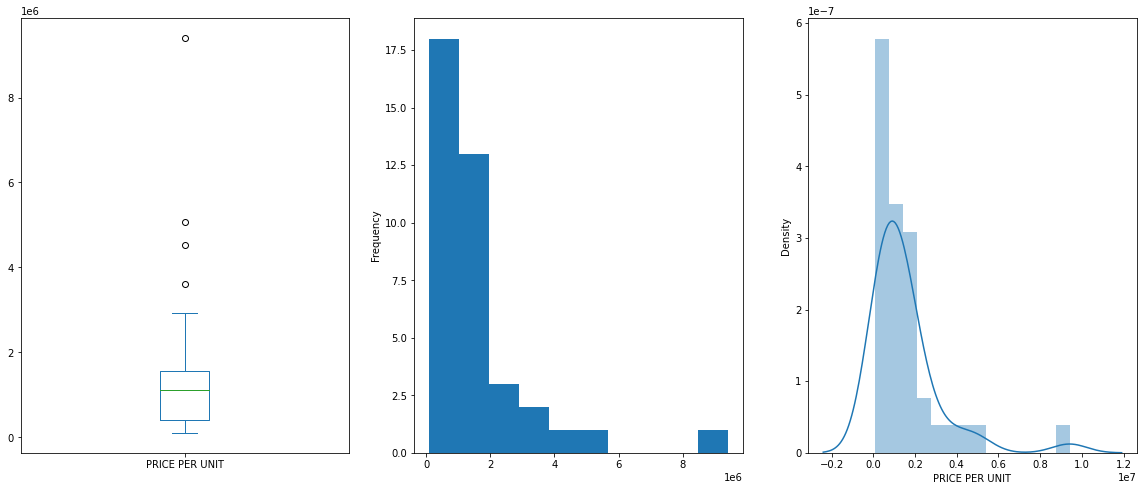

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(20,8))
data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].plot(kind='box', ax=axes[0])
data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].plot(kind='hist', ax=axes[1])
sns.distplot(data1[data1['BOROUGH']=='1']['PRICE PER UNIT'])


In [26]:
print('Skewness:')
print(data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].skew())
print('\n')

print('Kurtosis:')
print(data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].kurtosis())

Skewness:
2.950142836675303


Kurtosis:
11.063813610129483


**Kesimpulan:** Data tidak berdistribusi normal 

#### *Cleaning outlier* menggunakan Z-score

In [27]:
lower_limit=data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].mean() - 3 * data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].std()
upper_limit=data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].mean() + 3 * data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].std()

print(f'Lower limit: {lower_limit}')
print(f'Upper limit: {upper_limit}')


Lower limit: -3691589.9263781672
Upper limit: 6707946.541762783


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


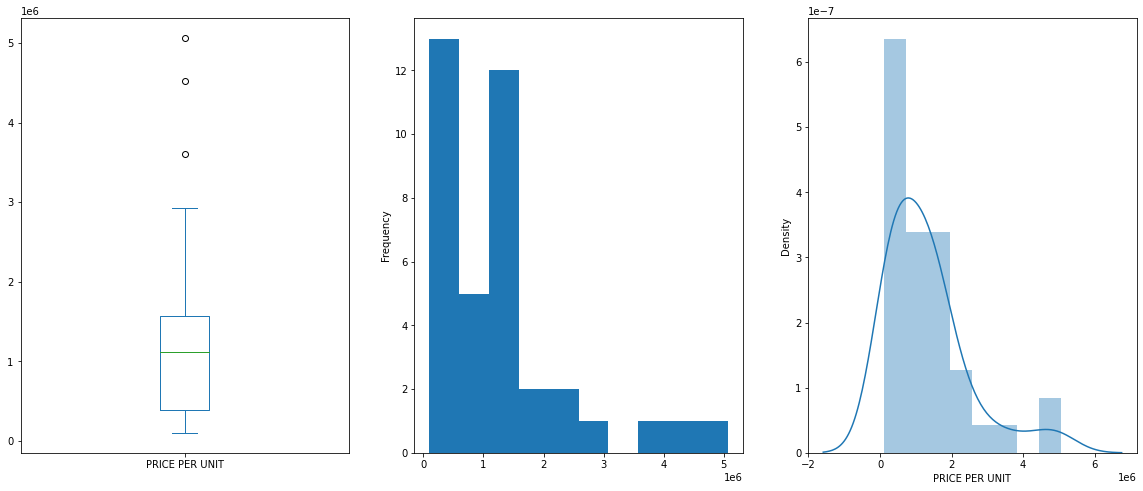

In [ ]:
PPU_no_outlier1 = data1[data1['BOROUGH']=='1']['PRICE PER UNIT'][(data1['PRICE PER UNIT']>=lower_limit) & (data1['PRICE PER UNIT']<=upper_limit)]

fig, axes = plt.subplots(ncols=3, figsize=(20,8))
PPU_no_outlier1.plot(kind='box', ax=axes[0])
PPU_no_outlier1.plot(kind='hist', ax=axes[1])
sns.distplot(PPU_no_outlier1)

In [ ]:
print('Skewness:')
print(PPU_no_outlier1.skew())
print('\n')

print('Kurtosis:')
print(PPU_no_outlier1.kurtosis())

Skewness:
1.6705643838306865


Kurtosis:
2.980765940934339


**Kesimpulan:** Masih terlihat pencilan dan kurva tidak simetris --> asumsi distribusi normal tidak terpenuhi

#### *Cleaning outlier* menggunakan TUKEY'S RULE

In [28]:
from pandas.core.algorithms import quantile
q1=data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].quantile(0.25)
q3=data1[data1['BOROUGH']=='1']['PRICE PER UNIT'].quantile(0.75)

IQR = q3-q1

lower_limit = q1 - IQR * 1.5
upper_limit = q3 + IQR * 1.5

print(f'Lower limit: {lower_limit}')
print(f'Upper limit: {upper_limit}')

Lower limit: -1365991.0
Upper limit: 3335761.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


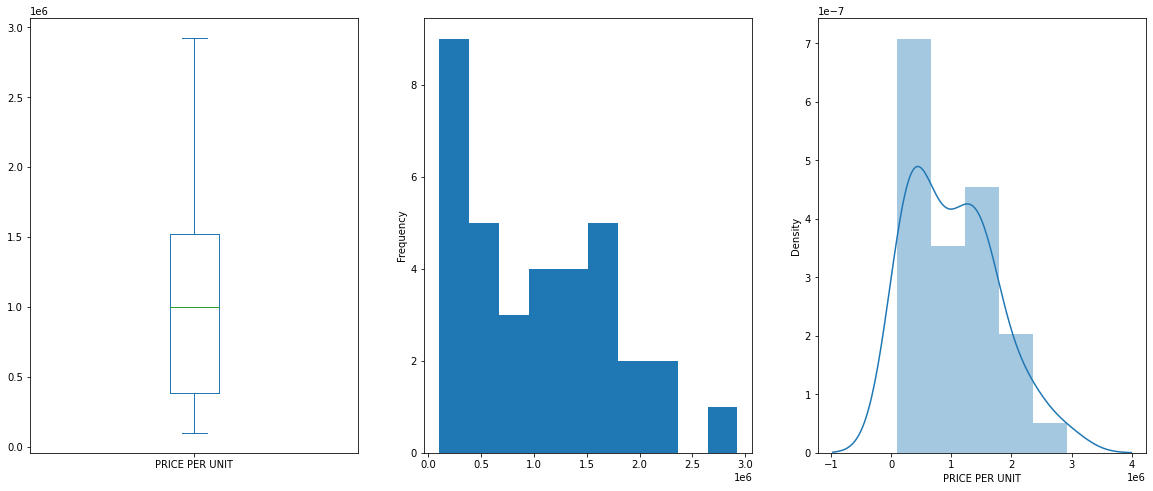

In [30]:
PPU_no_outlier1 = data1[data1['BOROUGH']=='1']['PRICE PER UNIT'][(data1['PRICE PER UNIT']>=lower_limit) & (data1['PRICE PER UNIT']<=upper_limit)]

fig, axes = plt.subplots(ncols=3, figsize=(20,8))
PPU_no_outlier1.plot(kind='box', ax=axes[0])
PPU_no_outlier1.plot(kind='hist', ax=axes[1])
sns.distplot(PPU_no_outlier1)

In [31]:
print('Skewness:')
print(PPU_no_outlier1.skew())
print('\n')

print('Kurtosis:')
print(PPU_no_outlier1.kurtosis())

Skewness:
0.6726348185754837


Kurtosis:
-0.15292943146204774


**Kesimpulan:** Terlihat dari grafik data sudah simetris dan angka skewness mendekati nol --> Data berdistribusi normal

# **SINGLE SAMPLE HYPOTHESIS TESTING**

Case: 
Diketahui rata2 harga per unit wilayah 1 pada tahun sebelumnya adalah 800000.  Untuk itu dilakukan pengujian apakah harga unit di wilayah 1 pada tahun ini mengalami kenaikan yang signifikan atau tidak.

Hipotesis:

H0:  μ <= 800000

H1:  μ > 800000

Taraf signifikansi (alpha) = 5%

In [32]:
t_stat, pval=stats.ttest_1samp(PPU_no_outlier1, 800000)
print('P-value', pval/2)
print('t-statistics', t_stat)

P-value 0.03156036048508447
t-statistics 1.9212163674012446


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


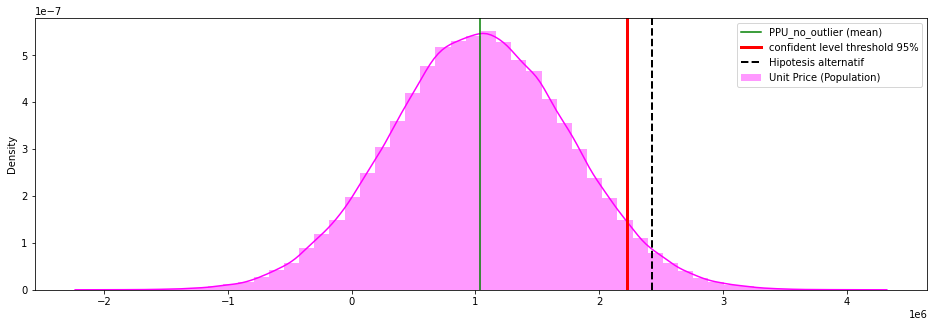

In [34]:
PPU_no_outlier1_pop = np.random.normal(PPU_no_outlier1.mean(), PPU_no_outlier1.std(), 100000)

CI=stats.norm.interval(0.90, PPU_no_outlier1.mean(), PPU_no_outlier1.std())

plt.figure(figsize=(16,5))
sns.distplot(PPU_no_outlier1_pop, label='Unit Price (Population)', color='magenta')
plt.axvline(PPU_no_outlier1.mean(), color='green', label='PPU_no_outlier (mean)')
plt.axvline(CI[1], color='red', linewidth=3, label='confident level threshold 95%')
plt.axvline(PPU_no_outlier1_pop.mean() + t_stat*PPU_no_outlier1_pop.std(), color='black', linestyle='dashed', linewidth=2, label='Hipotesis alternatif')
plt.legend()


**Kesimpulan:** Karena p-value = 0.03156 < 0.05 maka H0 ditolak, artinya dapat disimpulkan bahwa rata-rata unit price tahun ini secara signifikan lebih besar dari harga unit price tahun sebelumnya 

# **TWO SAMPLES INDEPENDENT TWO TAILES HYPOTHESIS TESTING**

**Preprocessing Data:**
Data unit price wilayah 5 

In [35]:
from pandas.core.algorithms import quantile
q1_2=data1[data1['BOROUGH']=='5']['PRICE PER UNIT'].quantile(0.25)
q3_2=data1[data1['BOROUGH']=='5']['PRICE PER UNIT'].quantile(0.75)

IQR_2 = q3_2-q1_2

lower_limit_2 = q1_2 - IQR * 1.5
upper_limit_2 = q3_2 + IQR * 1.5

print(f'Lower limit: {lower_limit_2}')
print(f'Upper limit: {upper_limit_2}')

Lower limit: -1511296.25
Upper limit: 2111581.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


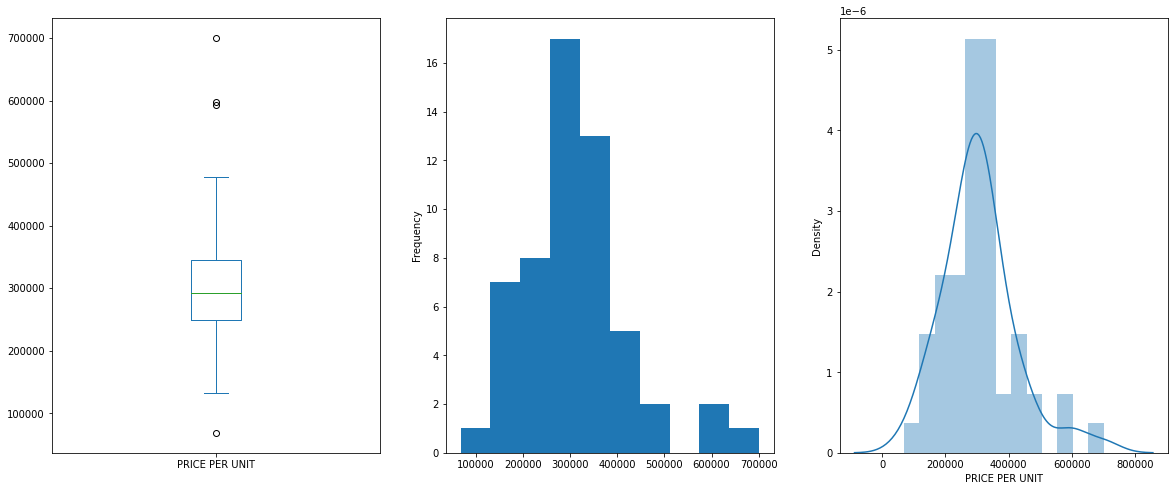

In [36]:
PPU_no_outlier2 = data1[data1['BOROUGH']=='5']['PRICE PER UNIT'][(data1['PRICE PER UNIT']>=lower_limit_2) & (data1['PRICE PER UNIT']<=upper_limit_2)]

fig, axes = plt.subplots(ncols=3, figsize=(20,8))
PPU_no_outlier2.plot(kind='box', ax=axes[0])
PPU_no_outlier2.plot(kind='hist', ax=axes[1])
sns.distplot(PPU_no_outlier2)

In [37]:
print('Skewness:')
print(PPU_no_outlier2.skew())
print('\n')

print('Kurtosis:')
print(PPU_no_outlier2.kurtosis())

Skewness:
0.9803570169775054


Kurtosis:
2.149347601280417


**Case:**
Apakah rata-rata unit price di wilayah 1 sama dengan wilayah 5?

Hipotesis:

H0:  μ1 = μ5 

H1:  μ1 != μ5

Taraf signifikansi (alpha) = 5%

In [38]:
t_stat, p_val = stats.ttest_ind(PPU_no_outlier1,PPU_no_outlier2)
print('P-value:',p_val)
print('t-statistics:',t_stat)

P-value: 7.081323116827627e-11
t-statistics: 7.405441724907574


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


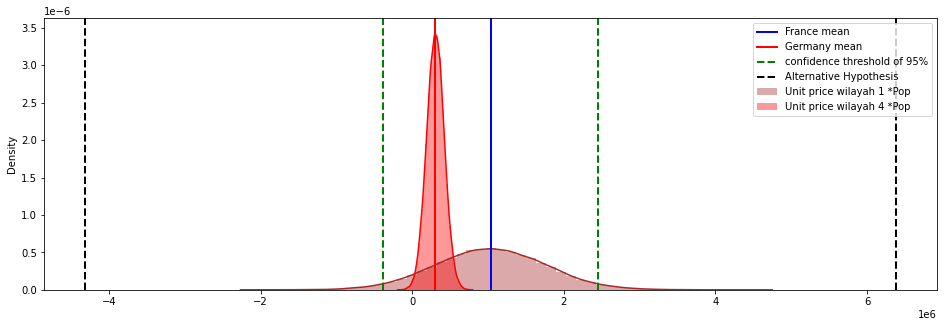

In [40]:
PPU_no_outlier1_pop = np.random.normal(PPU_no_outlier1.mean(),PPU_no_outlier1.std(),100000)
PPU_no_outlier2_pop = np.random.normal(PPU_no_outlier2.mean(),PPU_no_outlier2.std(),100000)

ci = stats.norm.interval(0.95, PPU_no_outlier1.mean(), PPU_no_outlier1.std())
plt.figure(figsize=(16,5))
sns.distplot(PPU_no_outlier1_pop, label='Unit price wilayah 1 *Pop',color='Brown')
sns.distplot(PPU_no_outlier2_pop, label='Unit price wilayah 4 *Pop',color='red')

plt.axvline(PPU_no_outlier1.mean(), color='blue', linewidth=2, label='France mean')
plt.axvline(PPU_no_outlier2.mean(), color='red',  linewidth=2, label='Germany mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(PPU_no_outlier1_pop.mean()+t_stat*PPU_no_outlier1_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(PPU_no_outlier1_pop.mean()-t_stat*PPU_no_outlier1_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

**Kesimpulan:** karena P-value = 7.0813e-11< 0.05 maka H0 ditolak, artinya rata-rata unit price wilayah 1 dengan wilayah 5 berbeda secara signifikan  